# MAchine Learning and Statistices 
# Project 2019
### Student:    David O'Brien
### Student ID: G00364766  

## Boston House Prices Dataset

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Describe
Use descriptive statistics and plots to describe the Boston house prices.  Tell us about the Boston house price data set. Tables and plots.  Pick out the interesting parst of dataset i.e. this is the key variable and whats going on with it.  Some plots will be important, others wont

Simple Linear Regression – get best fit line, use model to predict the value of houses https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341
Calculate the cost – measure the error of our model.  
https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2




# Exploring the Dataset

Variable | Description
-----|------
crim | per capita crime rate by town
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
nox | nitrogen oxides concentration (parts per 10 million)
rm | average number of rooms per dwelling
age | proportion of owner-occupied units built prior to 1940
dis | weighted mean of distances to five Boston employment centres
rad | index of accessibility to radial highways
tax | full-value property-tax rate per $10,000
ptratio | pupil-teacher ratio by town
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
lstat | lower status of the population (percent)
medv | median value of owner occupied home in thousands


In [15]:
# load data set and add column headers
df = pd.read_csv("bostondata.csv")

In [16]:
print(df.shape)
print(df)

(506, 14)
         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.09378  

In [17]:
df[0:5] # show the first five rows of data to confirm that the data has loaded correctly

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
# A summary of the main statistics are shown in the table below.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


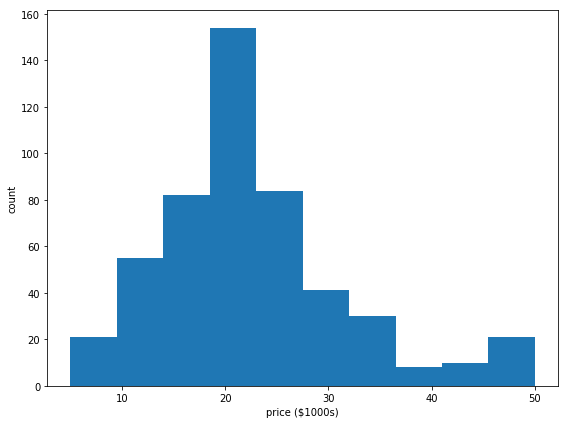

In [21]:
# Plot the distribution of the vedv variable
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df.medv)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


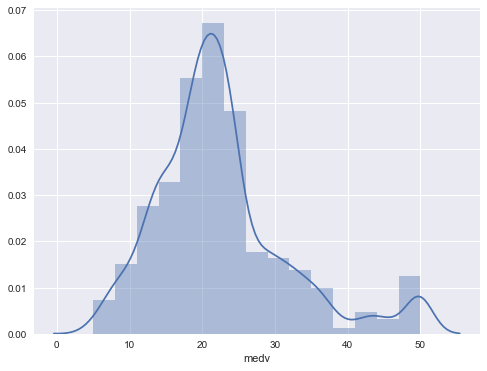

In [28]:
# plot a nicer looking graph using seaborn. Adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['medv'], bins=15)
plt.show()


Below, I have created a pair plot that details pairwise relationships in the data set.  There is a lot of information on this graph, but allows me to quickly spot any 

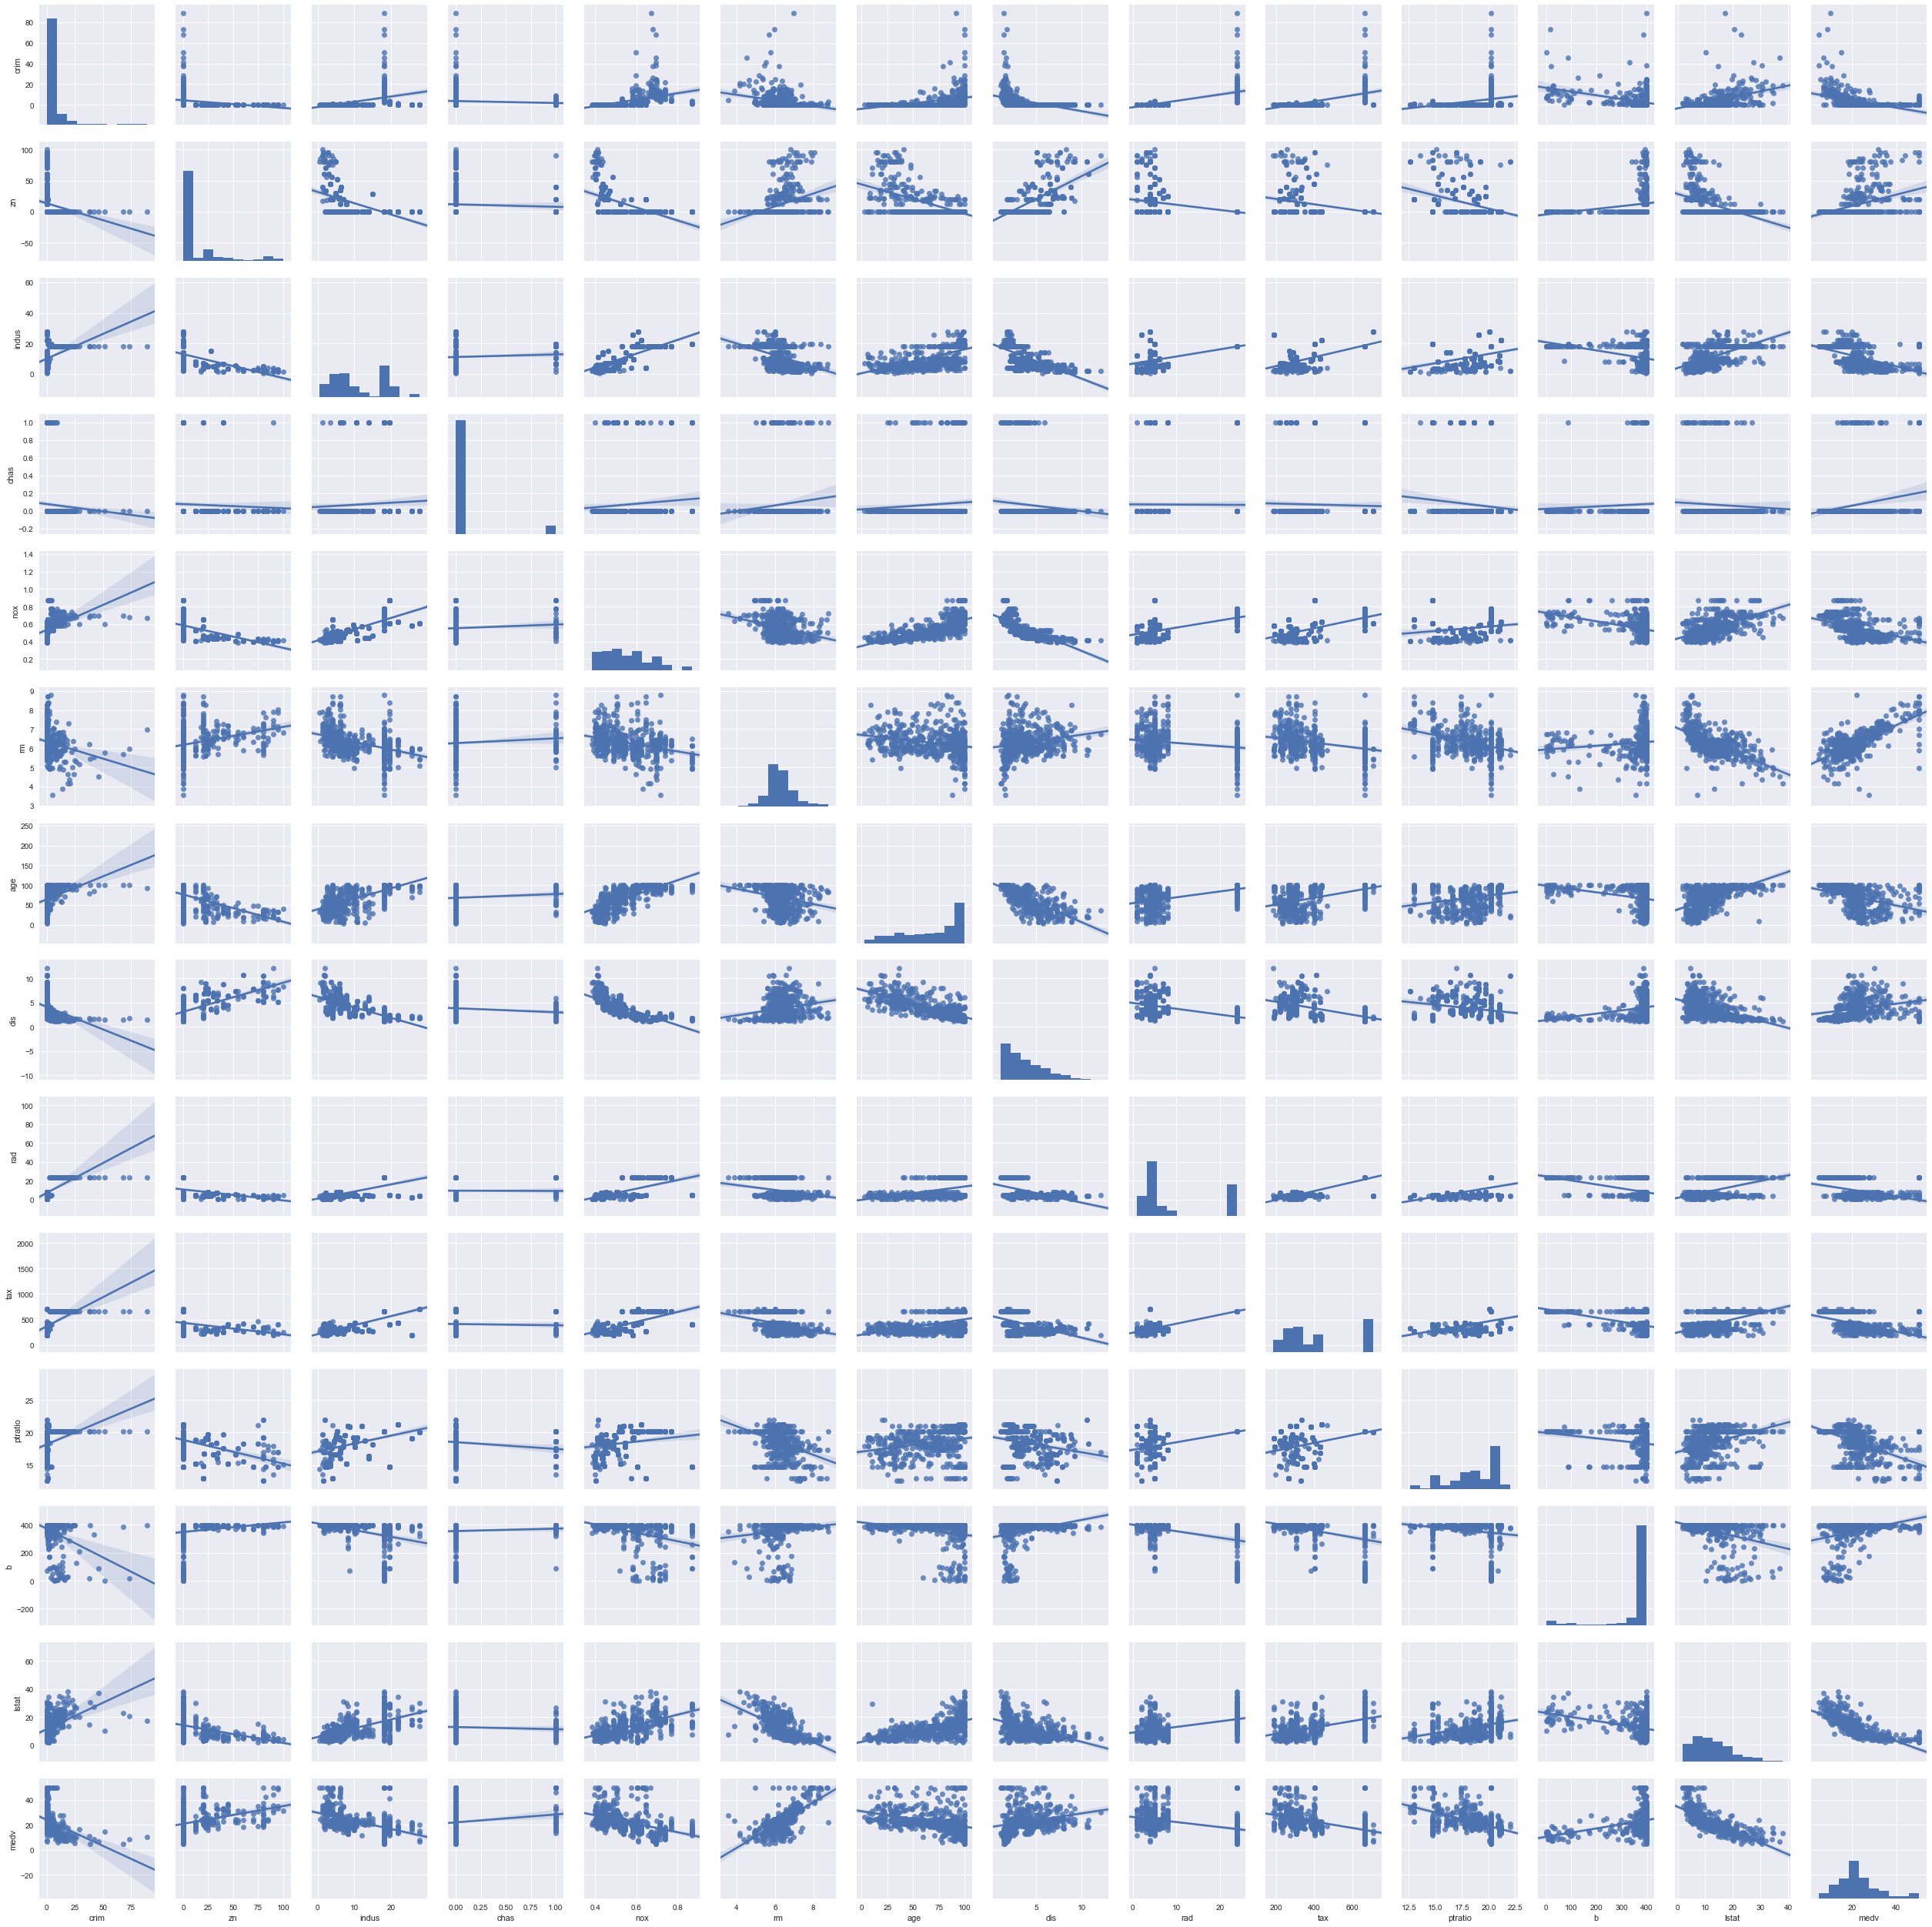

In [35]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
sns.pairplot(df, kind="reg") 

Too much information in the graph above, but useful for having a quick glance at the pairwise relationships in the dataset.  Focus on certain variables below

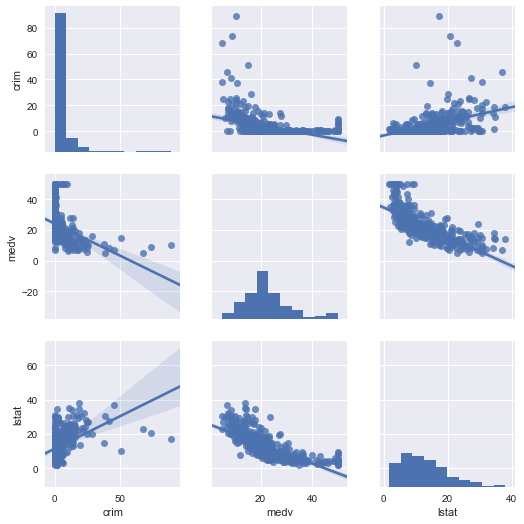

In [34]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
sns.pairplot(df, vars=["crim", "medv","lstat"], kind="reg") 

# Infer
Is there a difference between house prices between houses along the river, and houses that are not. Discuss the findings within the notebook.  Use inferential statistics to analyse this.
Correlations
Chi-square test
McNemars test
Independent t-test
Paired sample t-test
Welch's t-test
Wilcoxon signed-rank test
Linear regression
Logistic regression
One-way analysis of variance (ANOVA)
Two-way/N-way ANOVA

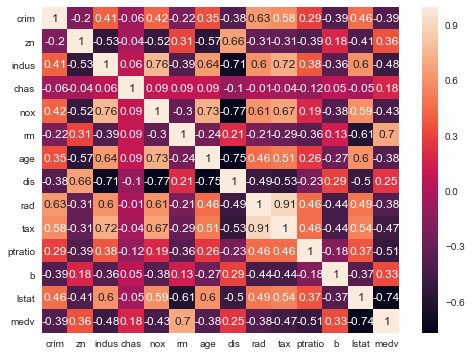

In [36]:
# adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Predict
Is there a difference between house prices between houses along the river, and houses that are not. Discuss the findings within the notebook.  Use inferential statistics to analyse this.

## References

1 - https://github.com/selva86/datasets/blob/master/BostonHousing.csv

2 - https://www.kaggle.com/c/boston-housing

3 - https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html

4 - https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

5 - https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

6 - https://pythonfordatascience.org/inferential-statistics/

7 - 

8 - 

9 - 

10 - 

11 - 
